In [1]:
%load_ext lab_black
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import os
import string

np.random.seed(1234)

import matplotlib

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [2]:
COMPILE_DATA = False
if COMPILE_DATA:
    df_lanc = pd.read_excel(
        "../experiments/02-region-locus-simulate/results/lanc-pitfall-het.xlsx"
    )
    df_lanc = df_lanc.iloc[5:10, 1:].set_index("effect_ratio")  # select hsq=0.006
    df_lanc.to_csv("data/Figure5.csv", index=False)

In [3]:
df_lanc = pd.read_csv("data/Figure5.csv")

In [4]:
def get_mean_sem(text: np.ndarray):
    """
    Parse mean and sem from a text array [mean (sem), ...,]
    """
    mean = np.array([float(f.split("(")[0]) for f in text])
    sem = np.array([float(f.split("(")[1].strip(")")) for f in text])
    return mean, sem


def add_legend(fig, axes, y, x=0.5):
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        ncol=len(handles),
        loc="center",
        bbox_to_anchor=[x, y],
        frameon=False,
        fontsize=9,
        handletextpad=0.02,
    )


def plot_het_lanc(df_lanc, axes):

    # heterogeneity statistics
    for i, method in enumerate(df_lanc.columns):
        tmp_mean, tmp_sem = get_mean_sem(df_lanc[method])
        # false positives
        axes[0].errorbar(
            x=(i - 1) * 0.15,
            y=tmp_mean[0],
            yerr=tmp_sem[0] * 1.96,
            fmt=".",
            lw=0.75,
            label=method,
        )

        if i != 2:
            # power
            axes[1].errorbar(
                x=np.arange(len(tmp_mean[1:])) + (i - 0.5) * 0.15,
                y=tmp_mean[1:],
                yerr=tmp_sem[1:] * 1.96,
                fmt=".",
                lw=0.75,
                label=method,
            )

    # false positives
    axes[0].set_xticks([0])
    axes[0].set_xticklabels([1.0], fontsize=9)
    axes[0].set_ylim(0, 0.25)
    axes[0].set_xlim(-0.5, 0.5)
    axes[0].axhline(y=0.05, ls="--", color="red", alpha=0.5, lw=0.8)
    axes[0].set_ylabel("False positive rate")

    # power
    axes[1].set_xticks(np.arange(len(tmp_mean) - 1))
    axes[1].set_xlim(-0.5, len(tmp_mean) - 1.5)
    axes[1].set_xticklabels(df_lanc.index[1:], fontsize=9)
    axes[1].set_ylim(0, 0.25)
    axes[1].axhline(y=0.05, ls="--", color="red", alpha=0.5, lw=0.8)
    axes[1].set_ylabel("Power")

    for i, ax in enumerate(axes):
        ax.text(
            -0.12,
            0.98,
            string.ascii_lowercase[i],
            transform=ax.transAxes,
            size=12,
            weight="bold",
        )

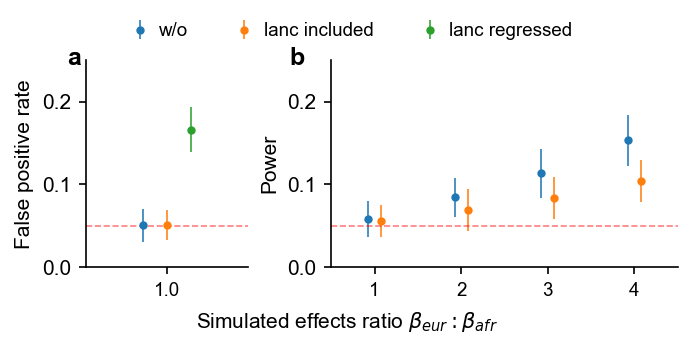

In [5]:
fig, axes = plt.subplots(
    dpi=150,
    figsize=(4.5, 2),
    ncols=2,
    gridspec_kw={"width_ratios": [1.4, 3]},
    constrained_layout=True,
)

## HET lanc
plot_het_lanc(df_lanc, axes)
fig.supxlabel(r"Simulated effects ratio $\beta_{eur} : \beta_{afr}$", fontsize=10)
add_legend(fig, axes, y=1.03)
fig.savefig("out/Figure5.pdf", bbox_inches="tight")